In [6]:
#Data science with python
# Application of data science

#step 1: import necesssary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 395.0 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 365.0 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
#load the bse_data dataset

df = pd.read_csv("crop.csv")

df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
#summary statistics 
print(df.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


/tmp/ipykernel_6224/606192661.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label', data=df, palette='plasma_r')


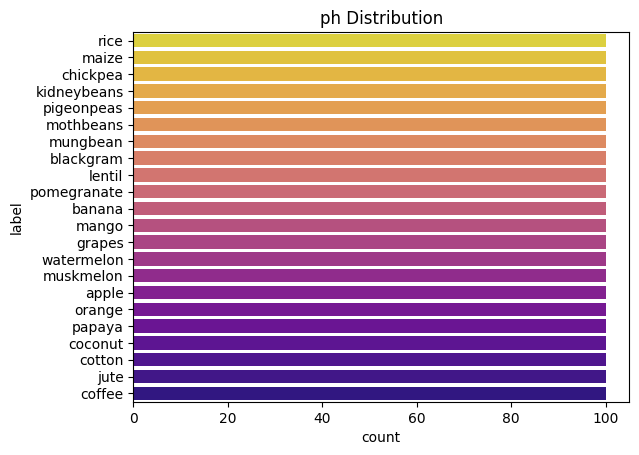

In [4]:
import seaborn as sns
sns.countplot(y='label', data=df, palette='plasma_r')
plt.title('ph Distribution')
plt.show()


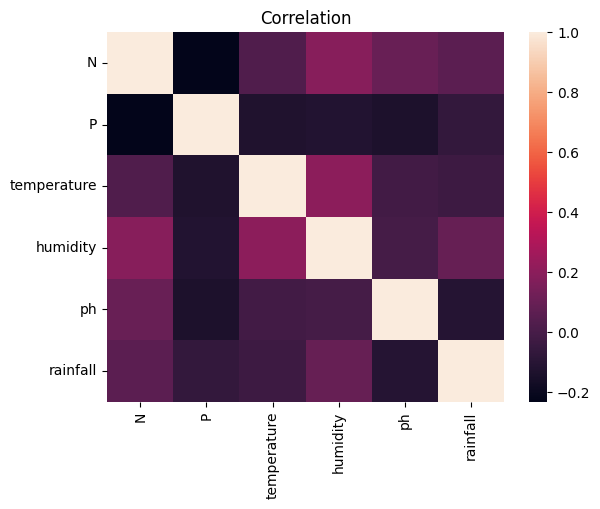

In [5]:
#data preprocessing
#for machine learning model

# Correlation, relationship between columns
c =df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target'] = c.cat.codes

y = df.target
X = df[['N', 'P', 'temperature','humidity','ph','rainfall']]

sns.heatmap(X.corr())
plt.title("Correlation")
plt.show()

In [9]:
#Machine learning models, set train and test data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = MinMaxScaler()
# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

#Apply the scaling to the test set as well so that we compute for the training set
X_test_scaled = scaler.transform(X_test)

In [10]:


# Selection of model: KNN, Confusion Matrix, Random forst, Use classification like SVM, decision tree
# Predict using knn

from sklearn.neighbors import KNeighborsClassifier 


knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
score = knn.score(X_test_scaled, y_test)
print(score)



0.9568181818181818


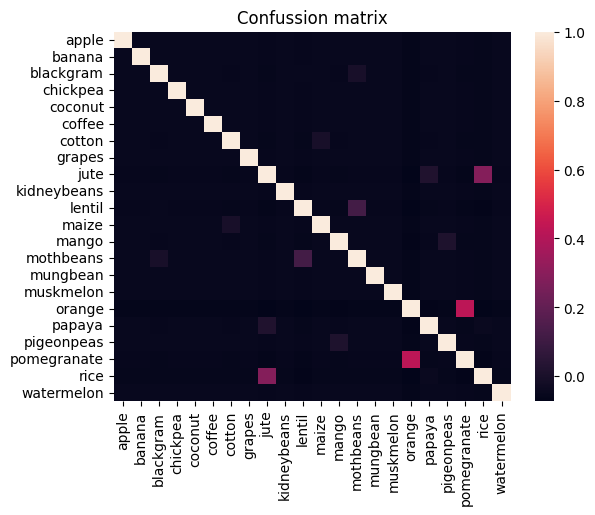

In [11]:
#let try confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, knn.predict(X_test_scaled))

df_cm = pd.DataFrame(mat,index=(i for i in targets.values()), columns=(targets.values()))
sns.heatmap(df_cm.corr())
plt.title("Confussion matrix")
plt.show()

In [12]:
#Classification using support vector classifier
from sklearn.svm import SVC

svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train_scaled, y_train)
score = svc_linear.score(X_test_scaled, y_test)
print(score)

svc_poly = SVC(kernel='poly')
svc_poly.fit(X_train_scaled, y_train)
score = svc_poly.score(X_test_scaled, y_test)
print(score)

svc_poly = SVC(kernel='rbf')
svc_poly.fit(X_train_scaled, y_train)
score = svc_poly.score(X_test_scaled, y_test)
print(score)

0.9340909090909091
0.9795454545454545
0.975


In [13]:
# Classifier using decision tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
dt.score(X_test_scaled, y_test)

0.9886363636363636

In [14]:
from sklearn.ensemble import RandomForestClassifier

dt = RandomForestClassifier()
dt.fit(X_train_scaled, y_train)
dt.score(X_test_scaled, y_test)


0.9954545454545455

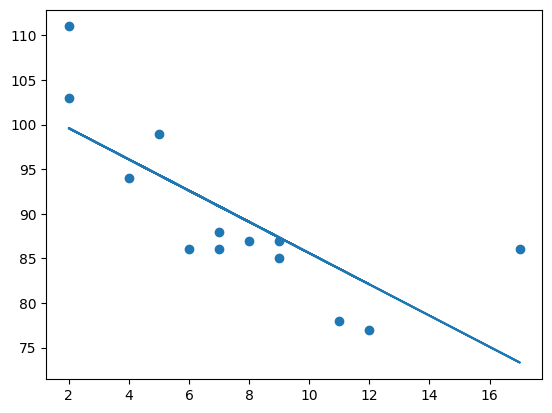

In [15]:


from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()



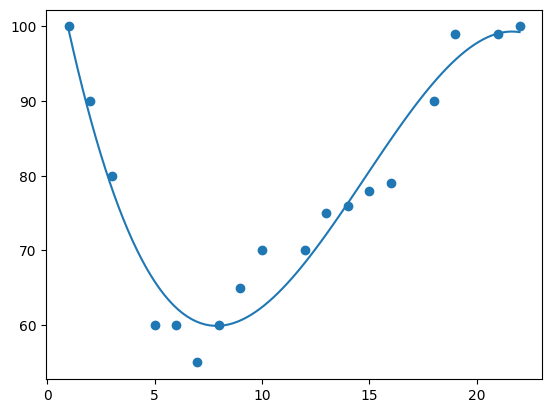

In [16]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()